# M3 - IP Detection & Digit Density Analysis

**Student ID**: IT24103925  
**Focus**: Detect direct IP usage and calculate digit density  
**Visualization**: Bar chart showing IP address frequency per label

## Overview

1. Detect direct IP address usage (a common phishing tactic)
2. Calculate digit density in URLs
3. Visualize the relationship between these features and phishing labels

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Load the dataset
data_path = '../data/raw/phishing_site_urls.csv'
df = pd.read_csv(data_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nLabel distribution:")
print(df['Label'].value_counts())
print(f"\nFirst few URLs:")
print(df.head())

Dataset loaded successfully!
Shape: (549346, 2)
Columns: ['URL', 'Label']

Label distribution:
Label
good    392924
bad     156422
Name: count, dtype: int64

First few URLs:
                                                 URL Label
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad
3  mail.printakid.com/www.online.americanexpress....   bad
4  thewhiskeydregs.com/wp-content/themes/widescre...   bad


## Feature Engineering: IP Detection

Function to detect if a URL contains a direct IP address.

In [4]:
def has_ip_address(url):
    """
    Check if URL contains a direct IP address
    Returns 1 if IP found, 0 otherwise
    """
    # IPv4 pattern: matches IP addresses like 192.168.1.1
    ipv4_pattern = r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b'
    
    # Check if the pattern matches in the URL
    if re.search(ipv4_pattern, url):
        return 1
    else:
        return 0

# Test the function with sample URLs
test_urls = [
    'http://192.168.1.1/login.php',
    'https://www.google.com/search',
    'http://127.0.0.1:8080/admin',
    'https://paypal.com/login'
]

print("Testing IP detection function:")
for url in test_urls:
    result = has_ip_address(url)
    print(f"{url} -> {'Has IP' if result == 1 else 'No IP'}")

Testing IP detection function:
http://192.168.1.1/login.php -> Has IP
https://www.google.com/search -> No IP
http://127.0.0.1:8080/admin -> Has IP
https://paypal.com/login -> No IP


## Feature Engineering: Digit Density

Calculate the digit density - the ratio of digits to total characters in a URL. URLs with high digit density might indicate suspicious patterns.

In [5]:
def calculate_digit_density(url):
    """
    Calculate the ratio of digits to total characters in URL
    Returns a value between 0 and 1
    """
    if len(url) == 0:
        return 0
    
    # Count digits in the URL
    digit_count = sum(1 for char in url if char.isdigit())
    
    # Calculate density
    digit_density = digit_count / len(url)
    return digit_density

# Test the function
test_urls = [
    'https://www.example.com',
    'http://192.168.1.1/login',
    'https://site123.com/page456',
    'http://test999888777.com/12345'
]

print("Testing digit density calculation:")
for url in test_urls:
    density = calculate_digit_density(url)
    print(f"{url} -> Digit density: {density:.3f}")

Testing digit density calculation:
https://www.example.com -> Digit density: 0.000
http://192.168.1.1/login -> Digit density: 0.333
https://site123.com/page456 -> Digit density: 0.222
http://test999888777.com/12345 -> Digit density: 0.467


## Apply Feature Extraction to Dataset



In [6]:
# Apply IP detection to all URLs
print("Extracting IP detection features...")
df['has_ip'] = df['URL'].apply(has_ip_address)

# Apply digit density calculation to all URLs
print("Calculating digit density for all URLs...")
df['digit_density'] = df['URL'].apply(calculate_digit_density)

print("Feature extraction completed!")

# Display sample results
print(f"\nSample of extracted features:")
sample_df = df[['URL', 'Label', 'has_ip', 'digit_density']].head(10)
print(sample_df.to_string(index=False))

# Basic statistics
print(f"\nFeature Statistics:")
print(f"URLs with IP addresses: {df['has_ip'].sum()} ({df['has_ip'].mean()*100:.2f}%)")
print(f"Average digit density: {df['digit_density'].mean():.4f}")
print(f"Max digit density: {df['digit_density'].max():.4f}")
print(f"Min digit density: {df['digit_density'].min():.4f}")

Extracting IP detection features...
Calculating digit density for all URLs...
Feature extraction completed!

Sample of extracted features:
                                                                                                                                                                                                                              URL Label  has_ip  digit_density
nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526   bad       0       0.257778
                                                                                                                                                www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_home-customer&nav=1/loading.php   bad       0       0.012346
                                                serviciosbys.com/paypal.cgi.bin.get-into.herf.se

## Data Analysis & Visualization

In [7]:
# Analyze IP usage by label
ip_analysis = df.groupby('Label')['has_ip'].agg(['count', 'sum', 'mean']).round(4)
ip_analysis.columns = ['Total_URLs', 'IPs_Found', 'IP_Percentage']
ip_analysis['IP_Percentage'] = ip_analysis['IP_Percentage'] * 100

print("IP Usage Analysis by Label:")
print(ip_analysis)

# Analyze digit density by label
digit_analysis = df.groupby('Label')['digit_density'].agg(['mean', 'std', 'min', 'max']).round(4)
print("\nDigit Density Analysis by Label:")
print(digit_analysis)

IP Usage Analysis by Label:
       Total_URLs  IPs_Found  IP_Percentage
Label                                      
bad        156422       8036           5.14
good       392924        124           0.03

Digit Density Analysis by Label:
         mean     std  min     max
Label                             
bad    0.1089  0.1519  0.0  0.8276
good   0.0593  0.0835  0.0  0.8000


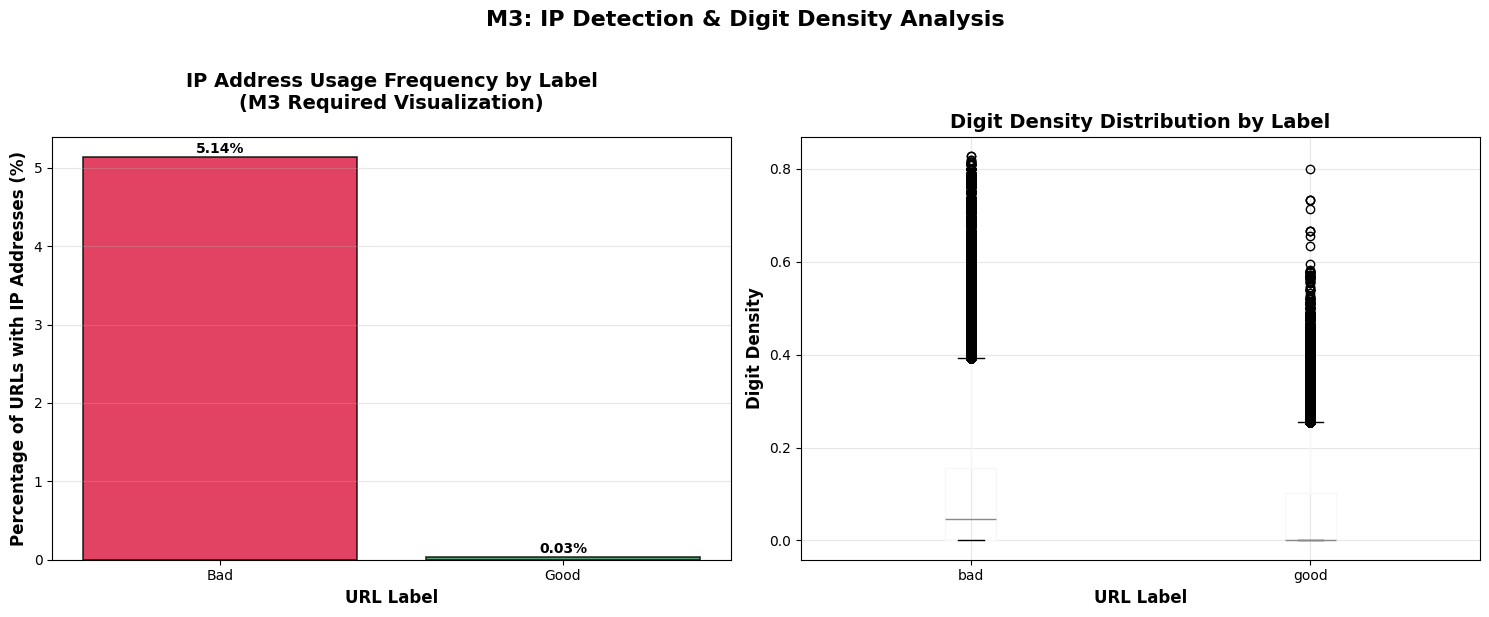


🔍 Key Insights from M3 Analysis:
1. IP Address Detection:
   - Bad URLs with IPs: 5.14%
   - Good URLs with IPs: 0.03%

2. Digit Density Analysis:
   - Bad URLs average digit density: 0.1089
   - Good URLs average digit density: 0.0593

✅ Malicious URLs show higher IP usage - confirms phishing pattern!


In [8]:
# Create the main visualization: Bar chart showing IP address frequency per label
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Chart 1: IP Address Usage by Label (Required visualization)
ip_counts = df.groupby(['Label', 'has_ip']).size().unstack(fill_value=0)
ip_percentages = df.groupby('Label')['has_ip'].mean() * 100

# Bar chart for IP usage percentages
labels = ip_percentages.index
x_pos = np.arange(len(labels))
bars = ax1.bar(x_pos, ip_percentages.values, 
               color=['#2E8B57' if label == 'good' else '#DC143C' for label in labels],
               alpha=0.8, edgecolor='black', linewidth=1.2)

ax1.set_xlabel('URL Label', fontsize=12, fontweight='bold')
ax1.set_ylabel('Percentage of URLs with IP Addresses (%)', fontsize=12, fontweight='bold')
ax1.set_title('IP Address Usage Frequency by Label\n(M3 Required Visualization)', 
              fontsize=14, fontweight='bold', pad=20)
ax1.set_xticks(x_pos)
ax1.set_xticklabels([label.title() for label in labels])
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2f}%', ha='center', va='bottom', fontweight='bold')

# Chart 2: Digit Density Distribution by Label
df.boxplot(column='digit_density', by='Label', ax=ax2)
ax2.set_xlabel('URL Label', fontsize=12, fontweight='bold')
ax2.set_ylabel('Digit Density', fontsize=12, fontweight='bold')
ax2.set_title('Digit Density Distribution by Label', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3)

plt.suptitle('M3: IP Detection & Digit Density Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Print key insights
print(f"\n🔍 Key Insights from M3 Analysis:")
print(f"{'='*50}")
print(f"1. IP Address Detection:")
for label in ip_percentages.index:
    print(f"   - {label.title()} URLs with IPs: {ip_percentages[label]:.2f}%")

print(f"\n2. Digit Density Analysis:")
for label in digit_analysis.index:
    mean_density = digit_analysis.loc[label, 'mean']
    print(f"   - {label.title()} URLs average digit density: {mean_density:.4f}")

if ip_percentages['bad'] > ip_percentages['good']:
    print(f"\n✅ Malicious URLs show higher IP usage - confirms phishing pattern!")
else:
    print(f"\n⚠️  Legitimate URLs show higher IP usage - unexpected pattern!")

## Feature Summary & Export

Let's create a summary of our extracted features and prepare the data for the next analysis phase.

In [10]:
# Create feature summary
feature_summary = pd.DataFrame({
    'Feature': ['has_ip', 'digit_density'],
    'Description': [
        'Binary flag indicating direct IP address usage (1=has IP, 0=no IP)',
        'Ratio of digits to total characters in URL (0-1 scale)'
    ],
    'Type': ['Binary', 'Continuous'],
    'Min_Value': [df['has_ip'].min(), df['digit_density'].min()],
    'Max_Value': [df['has_ip'].max(), df['digit_density'].max()],
    'Mean_Value': [df['has_ip'].mean(), df['digit_density'].mean()]
})

print("M3 Feature Engineering Summary:")
print("="*60)
print(feature_summary.to_string(index=False))

# Display final dataset structure
print(f"\nFinal dataset shape: {df.shape}")
print(f"New features added: has_ip, digit_density")
print(f"\nDataset columns: {df.columns.tolist()}")

# Save results for integration with other modules
# df.to_csv('../data/processed/m3_features.csv', index=False)

print("IP Detection & Digit Density features successfully extracted")


M3 Feature Engineering Summary:
      Feature                                                        Description       Type  Min_Value  Max_Value  Mean_Value
       has_ip Binary flag indicating direct IP address usage (1=has IP, 0=no IP)     Binary        0.0   1.000000    0.014854
digit_density             Ratio of digits to total characters in URL (0-1 scale) Continuous        0.0   0.827586    0.073423

Final dataset shape: (549346, 4)
New features added: has_ip, digit_density

Dataset columns: ['URL', 'Label', 'has_ip', 'digit_density']
IP Detection & Digit Density features successfully extracted
